In [ ]:
import pandas as pd
import numpy as np
import re
import string

In [ ]:
#importing the dataset
df=pd.read_csv('labeled_data.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
#finding missing values
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
#create a new column named label
df['labels']=df['class'].map({0:'Hate speech',1:'offensive_language',2:'Neither'})
df['labels']

0                   Neither
1        offensive_language
2        offensive_language
3        offensive_language
4        offensive_language
                ...        
24778    offensive_language
24779               Neither
24780    offensive_language
24781    offensive_language
24782               Neither
Name: labels, Length: 24783, dtype: object

In [ ]:
#feature selection i.e,picking the columns needed for the processing
df_new=df[['tweet','labels']]
df_new

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language
24779,"you've gone and broke the wrong heart baby, an...",Neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language
24781,youu got wild bitches tellin you lies,offensive_language


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
sw = set(stopwords.words("english"))

In [ ]:
stemmer=nltk.SnowballStemmer("english")

In [ ]:
def clean(text):
  text=str(text).lower()
  text=re.sub('https?://\S+|www\.S+','',text)
  text=re.sub('\[.*?\]','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d+\w*','',text)
  text=[words for words in text.split(' ') if words not in sw]
  text=" ".join(text)
  text=[stemmer.stem(words) for words in text.split(' ')]
  text=" ".join(text)
  return text

df_new['tweet']=df_new['tweet'].apply(clean)

<ipython-input-12-c7a181804943>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tweet']=df_new['tweet'].apply(clean)


In [ ]:
df_new

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,Neither
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,offensive_language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,offensive_language
3,rt cganderson vivabas look like tranni,offensive_language
4,rt shenikarobert shit hear might true might f...,offensive_language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,offensive_language
24779,youv gone broke wrong heart babi drove redneck...,Neither
24780,young buck wanna eat dat nigguh like aint fuck...,offensive_language
24781,youu got wild bitch tellin lie,offensive_language


In [ ]:
x=np.array(df_new['tweet'])
y=np.array(df_new['labels'])
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.42,random_state=40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,Y_test)
cm

array([[ 194,   30,  296],
       [  53, 1463,  244],
       [ 318,  276, 7535]])

<Axes: >

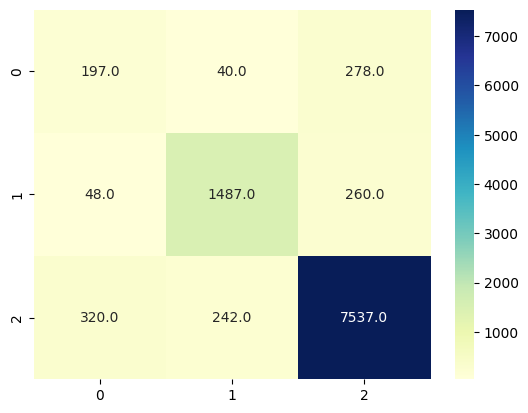

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='0.1f',cmap='YlGnBu')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.883081948313959

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_clf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_clf.fit(X_train_scaled, Y_train)
Y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy of SVM on test set: {accuracy:.2f}')

Accuracy of SVM on test set: 0.88


<Axes: >

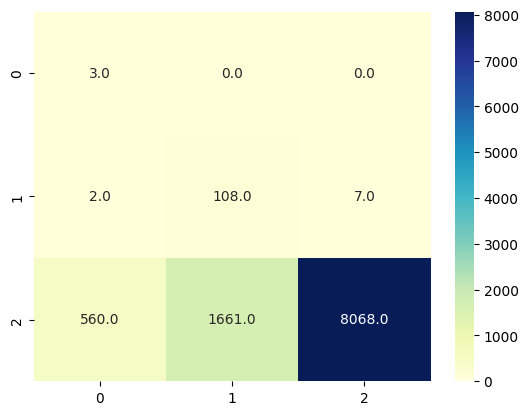

In [ ]:
y_pred=dt.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_pred,Y_test)
cm
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='0.1f',cmap='YlGnBu')